# Preliminary things  
Installed PostGIS
Installed GeoPandas

//Database
createdb internshala
//POSTGIS extension
psql -d internshala -c 'create extension POSTGIS'

gr2ogr -f PostgreSQL "PG:dbname=helloworld" gadm36_IND.gpkg

psql -d internshala -c "create table tb1(State TEXT,IOCL INT,HPCL INT,BPCL INT,TOTAL INT,TOTAL2014 INT)"

psql -d internshala -c "create table tb2(State TEXT,IOCL INT,HPCL INT,BPCL INT,TOTAL INT,TOTAL2014 INT)"

//loading file 

psql -d internshala -c "\COPY tb1 FROM 'datafile.csv' delimiter ',' csv header;"

psql -d internshala -c "\COPY tb2 FROM 'datafile2.csv' delimiter ',' csv header;"

In [31]:
import psycopg2
import osgeo.ogr
import shapely
import shapely.wkt
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 15})

In [32]:
import psycopg2

In [33]:
con = psycopg2.connect(database="internshala")

In [34]:
sql = ( "select * from gadm36_ind_1;")

# Reading Geopackage file of State_wise distribution from database

In [35]:
df = geopandas.read_postgis(sql,con,geom_col='wkb_geometry')

In [36]:
df.head()

,fid,gid_0,name_0,gid_1,name_1,varname_1,nl_name_1,type_1,engtype_1,cc_1,hasc_1,wkb_geometry
0,1,IND,India,IND.1_1,Andaman and Nicobar,Andaman & Nicobar Islands|Andaman et Nicobar|I...,None,Union Territor,Union Territory,None,IN.AN,"(POLYGON ((93.78772736000001 6.85264015, 93.78..."
1,2,IND,India,IND.2_1,Andhra Pradesh,None,None,State,State,None,IN.AP,"(POLYGON ((80.19264221 13.52069569, 80.1926422..."
2,3,IND,India,IND.3_1,Arunachal Pradesh,Agence de la Frontière du Nord-Est(French-obso...,None,State,State,None,IN.AR,"(POLYGON ((94.21111298 27.61084175, 94.2135086..."
3,4,IND,India,IND.4_1,Assam,None,None,State,State,None,IN.AS,"(POLYGON ((89.83874512 25.96647453, 89.8381424..."
4,5,IND,India,IND.5_1,Bihar,None,None,State,State,None,IN.BR,"(POLYGON ((87.26291655999999 27.85071564, 87.2..."


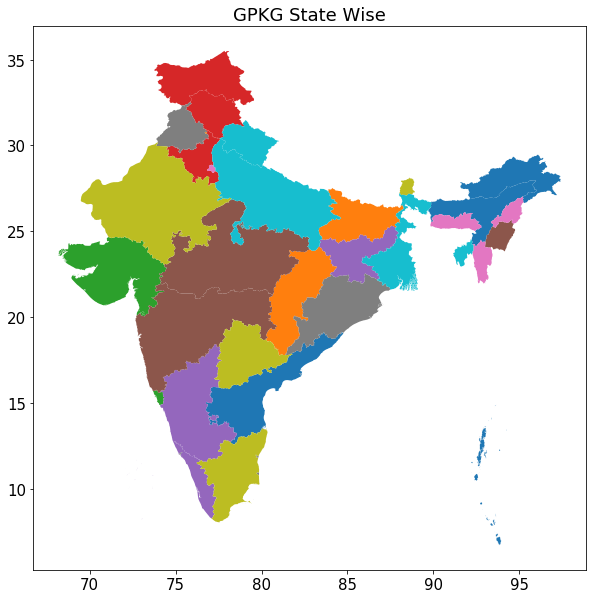

In [37]:
plt.rcParams["figure.figsize"] = (10,10)
df.plot('name_1')
plt.title('GPKG State Wise')
plt.show()

# Reading Consumer table from PostGis Database

In [38]:
query = 'select * from consumer'
consumers =pd.read_sql(query,con)

In [39]:
consumers.head()

,state,iocl,hpcl,bpcl,total,total2014
0,Andaman & Nicobar,63,0,0,63,59
1,Andhra Pradesh,5799,6635,3166,15600,14061
2,Arunachal Pradesh,183,0,1,183,164
3,Assam,2261,56,131,2448,2275
4,Bihar,2351,725,749,3825,3286


## Adding Geometry to Consumers Table

In [40]:
consumers=df.set_index('name_1').join(consumers.set_index('state')).reset_index()

In [41]:
consumers.head()

,name_1,fid,gid_0,name_0,gid_1,varname_1,nl_name_1,type_1,engtype_1,cc_1,hasc_1,wkb_geometry,iocl,hpcl,bpcl,total,total2014
0,Andaman and Nicobar,1,IND,India,IND.1_1,Andaman & Nicobar Islands|Andaman et Nicobar|I...,None,Union Territor,Union Territory,None,IN.AN,"(POLYGON ((93.78772736000001 6.85264015, 93.78...",NaN,NaN,NaN,NaN,NaN
1,Andhra Pradesh,2,IND,India,IND.2_1,None,None,State,State,None,IN.AP,"(POLYGON ((80.19264221 13.52069569, 80.1926422...",5799.0,6635.0,3166.0,15600.0,14061.0
2,Arunachal Pradesh,3,IND,India,IND.3_1,Agence de la Frontière du Nord-Est(French-obso...,None,State,State,None,IN.AR,"(POLYGON ((94.21111298 27.61084175, 94.2135086...",183.0,0.0,1.0,183.0,164.0
3,Assam,4,IND,India,IND.4_1,None,None,State,State,None,IN.AS,"(POLYGON ((89.83874512 25.96647453, 89.8381424...",2261.0,56.0,131.0,2448.0,2275.0
4,Bihar,5,IND,India,IND.5_1,None,None,State,State,None,IN.BR,"(POLYGON ((87.26291655999999 27.85071564, 87.2...",2351.0,725.0,749.0,3825.0,3286.0


### State Wise LPG Domestic Consumers

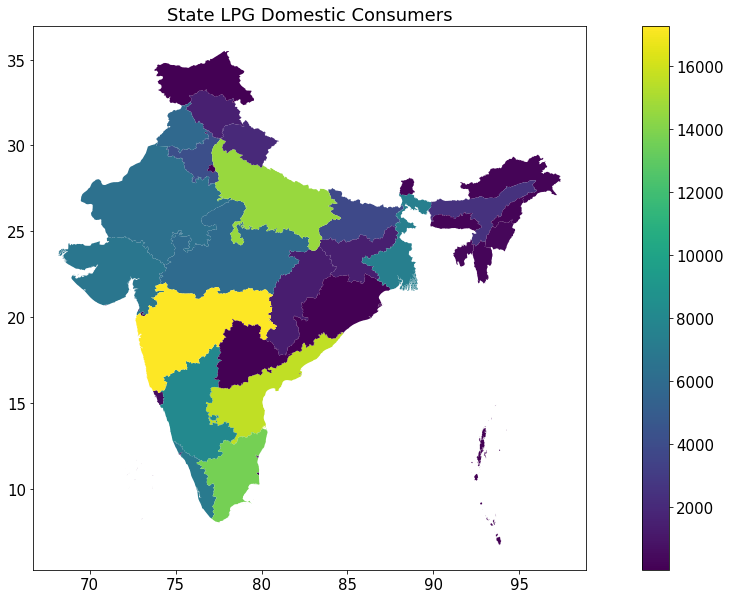

In [42]:
plt.rcParams["figure.figsize"] = (20,10)
consumers.plot(column='total',legend=True)
plt.title('State LPG Domestic Consumers',)
plt.show()

## Company Wise LPG Domestic Consumers

### 1. IOCL  2. HPCL  3.BPCL 

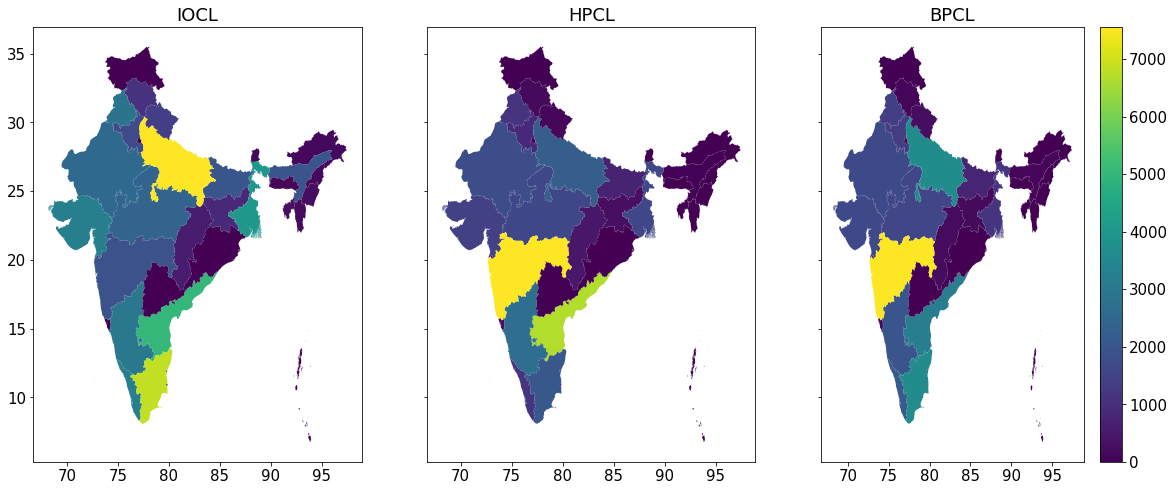

In [45]:
plt.rcParams["figure.figsize"] = (20,8)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharex=True, sharey=True)
consumers.plot(ax=ax1,column='iocl',)
consumers.plot(ax=ax2,column='hpcl',)
consumers.plot(ax=ax3,column='bpcl',legend=True)
ax1.title.set_text('IOCL')
ax2.title.set_text('HPCL')
ax3.title.set_text('BPCL')
plt.show()

In [48]:
query = 'select * from retailers'
retailers =pd.read_sql(query,con)

In [49]:
retailers.head()

,state,iocl,hpcl,bpcl,total,total2014
0,Andaman and Nicobar,9,0,0,9,9
1,Andhra Pradesh,1651,1173,970,3794,3374
2,Arunachal Pradesh,48,0,1,49,48
3,Assam,474,72,43,589,561
4,Bihar,1074,331,466,1871,1653


### Adding Geometry to Retailers Table

In [50]:
retailers=df.set_index('name_1').join(retailers.set_index('state')).reset_index()

### State wise Retailer outlets 

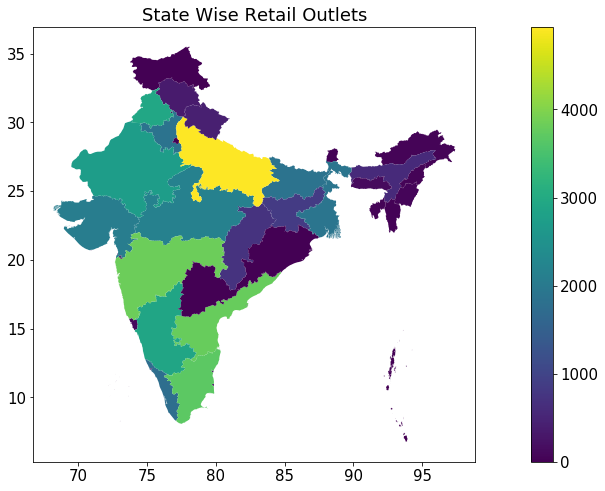

In [53]:
retailers.plot(column='total',legend=True)
plt.title('State Wise Retail Outlets',)
plt.show()

### Company Wise Retail Outlets 

### 1. IOCL 2. HPCL 3. BPCL

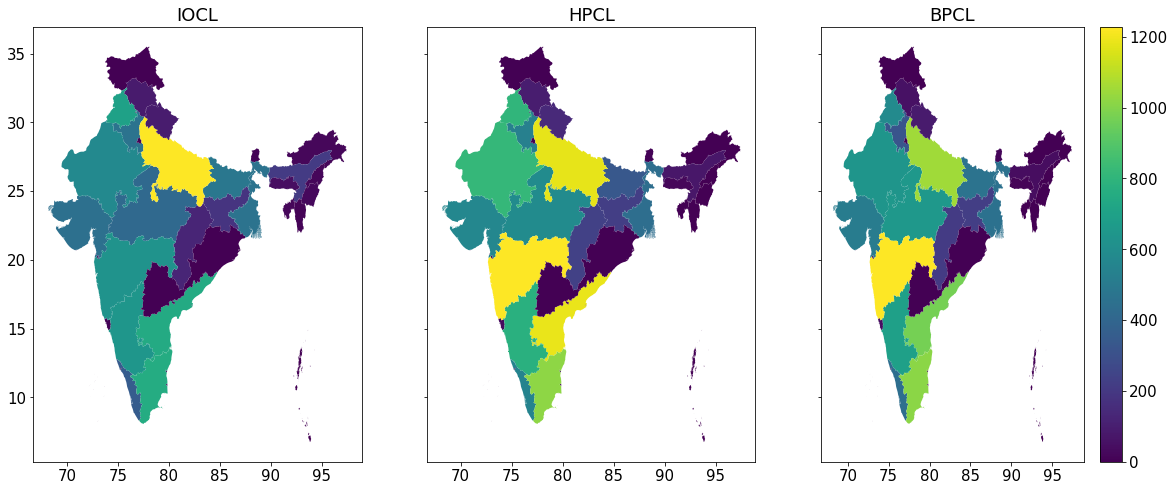

In [54]:
plt.rcParams["figure.figsize"] = (20,8)
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharex=True, sharey=True)
retailers.plot(ax=ax1,column='iocl')
retailers.plot(ax=ax2,column='hpcl')
retailers.plot(ax=ax3,column='bpcl',legend=True)
ax1.title.set_text('IOCL')
ax2.title.set_text('HPCL')
ax3.title.set_text('BPCL')
plt.show()